## 第5章　Pythonを使った人工知能の前処理を学ぶ

### 5.1　はじめに

### 5.2　デーブルデータにおける欠損値の取り扱い

5.2.2

In [7]:
import pandas as pd
# カンマ区切りでcsvファイルを読み込み、性別を0,1に置き換える
df=pd.read_csv('C:\\Users\\baseb\\戸倉勉強会\\titanic\\train.csv',sep=',').replace("male",0).replace("female",1)

print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886        

Memo  
データの欠損  
 ①MCAR(missing completely at random):完全にランダムな原因  
 ②MAR(missing at random):観測データに依存する  
 ③MNAR(missing not at random):欠損値の発生が欠損値そのものに依存する   
対策  
 ①欠損値を含むサンプルを全て除外して行う完全ケース分析→MARやMNARを多く含むと解析結果に大きな歪が生じる  
 ②欠損値を補完して行う手法→対策①の問題を解決するために用いられる  
   ・平均値代入法  
   ・回帰代入法  
   　→近年では多重代入法

5.2.3

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Memo  
・dropna()：データ欠損のある行または列を削除する(リストワイズ削除)  
・fillna()：データ欠損のある要素を補完する

5.2.4

In [9]:
df=df.dropna()
df.isnull().sum() #削除した結果を確認

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

5.2.5

In [10]:
print(df['Age'])

1      38.0
3      35.0
6      54.0
10      4.0
11     58.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 183, dtype: float64


Memo  
【重要】リストワイズ削除を行う場合はデータ数の減少に特に注意すべきである

5.2.6

In [8]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

5.2.7

In [10]:
print(df['Age']) #Ageの列だけ表示

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


5.2.8

In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from pandas.plotting import scatter_matrix

5.2.9

In [12]:
#分類するクラスの種類と数を確認(ここではSurvivedクラス)
df['Survived'].value_counts()

1    123
0     60
Name: Survived, dtype: int64

5.2.10

In [13]:
#不要なクラスを削除
df2=df.drop(["Name","SibSp","Parch","Ticket","Cabin","Embarked"],axis=1)

train_dataset=df2.values
train_x=train_dataset[:,2:] #Survived以降の変数
train_y=train_dataset[:,1] #正解クラス

#訓練用の説明変数と正解クラス、評価用の説明変数と正解クラスに分割
(train_x,test_x,train_y,test_y)=train_test_split(train_x,train_y,test_size=0.3,random_state=0)

In [14]:
df2.values

array([[  2.    ,   1.    ,   1.    ,   1.    ,  38.    ,  71.2833],
       [  4.    ,   1.    ,   1.    ,   1.    ,  35.    ,  53.1   ],
       [  7.    ,   0.    ,   1.    ,   0.    ,  54.    ,  51.8625],
       ...,
       [880.    ,   1.    ,   1.    ,   1.    ,  56.    ,  83.1583],
       [888.    ,   1.    ,   1.    ,   1.    ,  19.    ,  30.    ],
       [890.    ,   1.    ,   1.    ,   0.    ,  26.    ,  30.    ]])

In [15]:
train_x

array([[  2.    ,   1.    ,   4.    ,  39.    ],
       [  1.    ,   0.    ,  44.    ,  90.    ],
       [  1.    ,   0.    ,  45.    ,  26.55  ],
       [  1.    ,   1.    ,  19.    ,  26.2833],
       [  1.    ,   0.    ,  46.    ,  79.2   ],
       [  1.    ,   0.    ,  64.    , 263.    ],
       [  1.    ,   1.    ,  24.    ,  69.3   ],
       [  1.    ,   1.    ,  24.    ,  49.5042],
       [  1.    ,   0.    ,  48.    ,  26.55  ],
       [  1.    ,   0.    ,  31.    ,  52.    ],
       [  1.    ,   0.    ,  61.    ,  33.5   ],
       [  1.    ,   0.    ,  11.    , 120.    ],
       [  1.    ,   1.    ,  38.    , 227.525 ],
       [  1.    ,   1.    ,  40.    , 153.4625],
       [  1.    ,   0.    ,  33.    ,   5.    ],
       [  1.    ,   1.    ,  52.    ,  78.2667],
       [  1.    ,   1.    ,  36.    , 135.6333],
       [  1.    ,   0.    ,  54.    ,  51.8625],
       [  1.    ,   1.    ,  18.    , 262.375 ],
       [  1.    ,   1.    ,  16.    ,  86.5   ],
       [  1.    ,   

In [16]:
train_y

array([1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1.])

In [17]:
(train_x,test_x,train_y,test_y)

(array([[  2.    ,   1.    ,   4.    ,  39.    ],
        [  1.    ,   0.    ,  44.    ,  90.    ],
        [  1.    ,   0.    ,  45.    ,  26.55  ],
        [  1.    ,   1.    ,  19.    ,  26.2833],
        [  1.    ,   0.    ,  46.    ,  79.2   ],
        [  1.    ,   0.    ,  64.    , 263.    ],
        [  1.    ,   1.    ,  24.    ,  69.3   ],
        [  1.    ,   1.    ,  24.    ,  49.5042],
        [  1.    ,   0.    ,  48.    ,  26.55  ],
        [  1.    ,   0.    ,  31.    ,  52.    ],
        [  1.    ,   0.    ,  61.    ,  33.5   ],
        [  1.    ,   0.    ,  11.    , 120.    ],
        [  1.    ,   1.    ,  38.    , 227.525 ],
        [  1.    ,   1.    ,  40.    , 153.4625],
        [  1.    ,   0.    ,  33.    ,   5.    ],
        [  1.    ,   1.    ,  52.    ,  78.2667],
        [  1.    ,   1.    ,  36.    , 135.6333],
        [  1.    ,   0.    ,  54.    ,  51.8625],
        [  1.    ,   1.    ,  18.    , 262.375 ],
        [  1.    ,   1.    ,  16.    ,  86.5   ],


5.2.11

In [18]:
#識別モデルの構築(ランダムフォレスト)
forest=RandomForestClassifier(max_depth=3,n_estimators=100,random_state=0)

#学習させます
forest=forest.fit(train_x,train_y)

#予測値の算出
y_pred=forest.predict(test_x)

#モデル学習時のモデル識別精度
trainaccuracy_random_forest=forest.score(train_x,train_y)
print('TrainAccuracy: {}'.format(trainaccuracy_random_forest))

#評価用データセットでの識別精度
accuracy_random_forest=accuracy_score(test_y,y_pred)
print('Accuracy: {}'.format(accuracy_random_forest))

#recallの評価
recall_random_forest=recall_score(test_y,y_pred)
print('Recall: {}'.format(recall_random_forest))

TrainAccuracy: 0.8046875
Accuracy: 0.8181818181818182
Recall: 0.9047619047619048


5.2.12

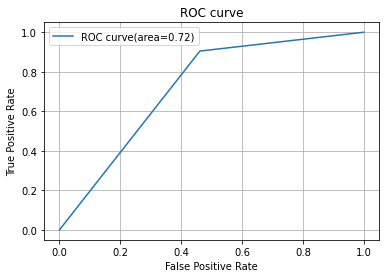

In [19]:
#FPR、TPR、しきい値を算出
fpr,tpr,thresholds=metrics.roc_curve(test_y,y_pred)

#AUCの計算
auc=metrics.auc(fpr,tpr)

#ROC曲線をプロット
plt.plot(fpr,tpr,label='ROC curve(area=%.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)


Memo  
①MCAR：リストワイズ削除処理  
②MAR・MNAR:一意の値を代入する方法、多重代入法

### 5.3 スケール変換　

Memo  
【重要】データのスケール変換時はデータの外れ値の取扱いに注意する  
  
StandardScaler：個々の特徴量の平均を0、分散を1に変換  
MinMaxScaler：データを0から1の間にすべて入るように変換  
RobustScaler：中央値と四分位数を用いて変換  
Nomalizer：個々の特徴量におけるユークリッド距離が1になるように変換

5.3.1

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler

iris=datasets.load_iris() #skleanにあるアヤメのデータセットを利用
df=pd.DataFrame(iris.data,columns=iris.feature_names)

5.3.2

In [22]:
df['target']=iris.target_names[iris.target]  #データセットを確認
print(df.head())

X=iris.data
Y=iris.target

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
#データセットを学習用と評価用に分割
print(len(X_train),len(Y_train),len(X_test),len(Y_test))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
105 105 45 45


5.3.3